# Evaluation

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [12]:
%matplotlib inline

from __future__ import division
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import brightside as bs
import numpy as np
import os
import experiments as exp
import ntcir
import ntcir.IO as IO

import sklearn.metrics as metrics

In [13]:
categories = IO.load_categories(ntcir.filepaths)

In [3]:
from keras import backend as K
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.8):
    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

KTF.set_session(get_session())

### VGG-16

In [4]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/test/',
                target_size=(224, 224),
                batch_size=1)

model = exp.vgg_16_second_phase_model('weights.VGG-16.best.tf.hdf5')

Found 2582 images belonging to 21 classes.


In [5]:
groundtruth = list()
predictions = list()
for i, (img, target) in enumerate(test_generator):
    if i == test_generator.n:
        break
    prediction = model.predict(img)
    predictions.append(np.argmax(prediction))
    groundtruth.append(np.argmax(target))

In [5]:
groundtruth = list()
predictions = list()
for i, (img, target) in enumerate(test_generator):
    if i == test_generator.n:
        break
    prediction = model.predict(img)
    predictions.append(np.argmax(prediction))
    groundtruth.append(np.argmax(target))
    
predictions = np.asarray(predictions)
groundtruth = np.asarray(groundtruth)

np.savetxt('VGG16.test.txt', np.vstack((groundtruth, predictions)).T, delimiter=",")

In [7]:
vgg16_results = np.loadtxt('VGG16.test.txt', delimiter=',')
groundtruth, predictions = np.split(vgg16_results, 2, axis=1)

<brightside.Attribute instance at 0x7f08b4727e60>

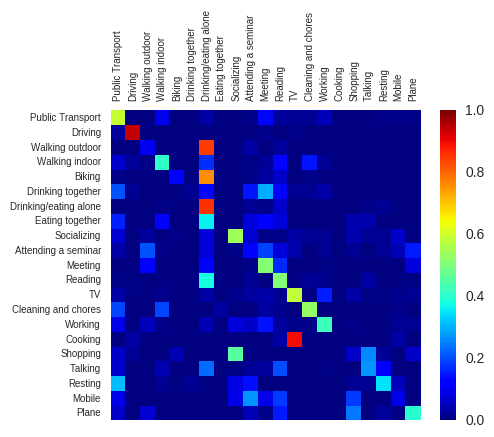

In [17]:
fig, ax = bs.show_confusion_matrix(groundtruth, predictions, categories, (5,4), ticks_size=7, show_xticks=True)
accuracy = metrics.accuracy_score(groundtruth, predictions)
bs.print_attribute('Accuracy: ', accuracy)